In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('employee_retention_data.csv', parse_dates = ['join_date', 'quit_date'])
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Table: day, employee_headcount, company_id

In [6]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq = 'D')
unique_company = sorted(data['company_id'].unique())

day = []
headcount = []
company = []

for date in unique_date:
    for idx in unique_company:
        total_join = len(data[(data['join_date'] <= date) & (data['company_id'] == idx)])
        total_quit = len(data[(data['quit_date'] <= date) & (data['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)
        
table = pd.DataFrame({'day':day, 'company_id':company, 'employee_headcount':headcount}, 
                     columns = ['day', 'company_id', 'employee_headcount'])

In [7]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


In [8]:
#Seperate quit data & stay data
quit_data = data[~data['quit_date'].isnull()]
stay_data = data[data['quit_date'].isnull()]

C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


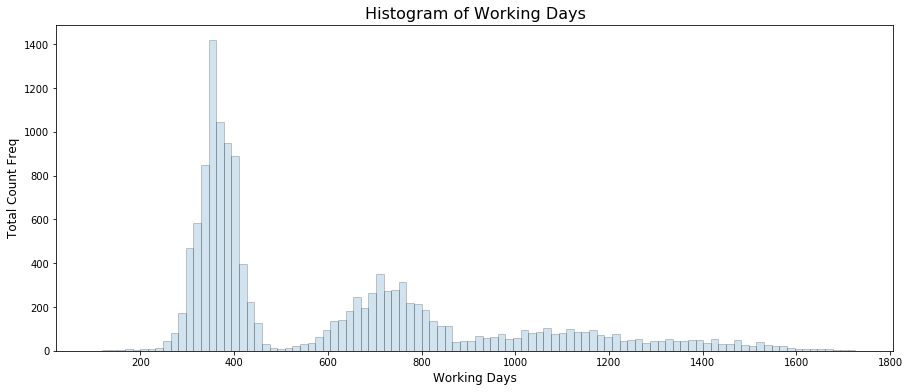

In [9]:
work_days = np.array(list(map(lambda x : x.days, quit_data['quit_date'] - quit_data['join_date'])))

hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}
fig,ax = plt.subplots(figsize = (15,6))
sns.distplot(work_days, bins = 100, kde = False, ax = ax, hist_kws = hist_kws)
ax.set_title('Histogram of Working Days', fontsize = 16)
ax.set_xlabel('Working Days', fontsize = 12)
ax.set_ylabel('Total Count Freq', fontsize = 12)
plt.show()

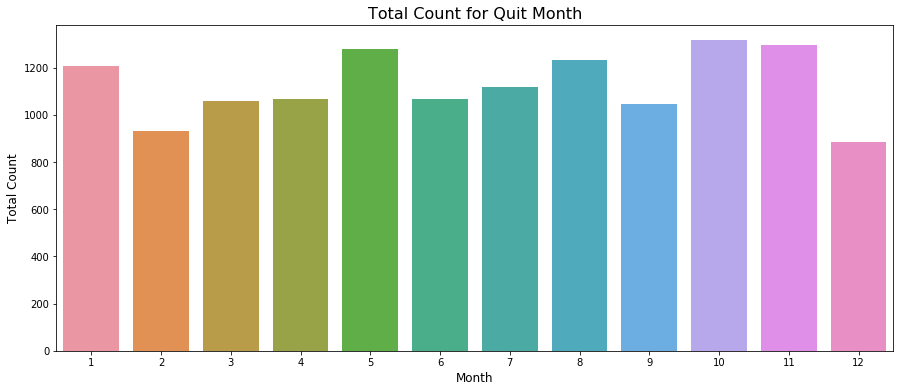

In [10]:
#Month for quit
quit_month = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))

fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(quit_month, ax= ax)
ax.set_title('Total Count for Quit Month', fontsize = 16)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Total Count', fontsize = 12)
plt.show()

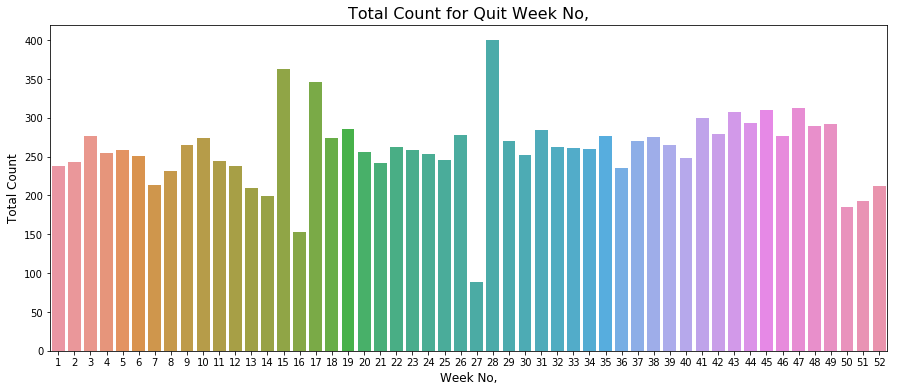

In [11]:
# Week No. for quit
quit_week = np.array(list(map(lambda x: x.week, quit_data['quit_date'])))
fig, ax = plt.subplots(figsize = (15,6))
sns.countplot(quit_week, ax = ax)
ax.set_title('Total Count for Quit Week No,', fontsize =16)
ax.set_xlabel('Week No,', fontsize = 12)
ax.set_ylabel('Total Count', fontsize = 12)
plt.show()

In [12]:
quit_data['work_days'] = work_days
quit_data['quit_week'] = quit_week

quit_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days,quit_week
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,44
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,14
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,23
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,34
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578,35


In [13]:
quit_data.describe()

,employee_id,company_id,seniority,salary,work_days,quit_week
count,13510.000000,13510.000000,13510.000000,13510.000000,13510.000000,13510.000000
mean,502039.463138,3.459511,14.131458,135652.405625,613.486825,26.843449
std,287981.253645,2.709589,8.008437,71443.847770,328.622613,14.860329
min,36.000000,1.000000,1.000000,17000.000000,102.000000,1.000000
25%,252829.500000,1.000000,7.000000,81000.000000,361.000000,14.000000
50%,501207.500000,2.000000,14.000000,122000.000000,417.000000,28.000000
75%,755069.250000,5.000000,21.000000,180000.000000,781.000000,40.000000
max,999969.000000,12.000000,99.000000,379000.000000,1726.000000,52.000000


# Analysis for Early Quit(Less than 13 months)

In [14]:
#there are 50% employess quit for their work_days > 417, which is almost more than one year
stop_date = pd.to_datetime('2015-12-13') - pd.DateOffset(days = 365 + 31)
subset = data[data['join_date'] < stop_date]

#Binary Label for early quit(less than 13 months)
quit = subset['quit_date'].isnull() | (subset['quit_date'] > subset['join_date'] + pd.DateOffset(days = 396))
subset['quit'] = 1 - quit.astype(int)

subset.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [15]:
#Label Encoder
label = LabelEncoder()
train_x = subset[['dept', 'seniority', 'salary']]
train_x['dept'] = label.fit_transform(subset['dept'])
train_y = subset['quit'].values

train_x.head()


,dept,seniority,salary
0,0,28,89000.0
1,4,20,183000.0
2,4,14,101000.0
3,0,20,115000.0
4,1,23,276000.0


In [16]:
#Decision Tree Classification
clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 30, random_state = 50)
clf.fit(X = train_x, y = train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

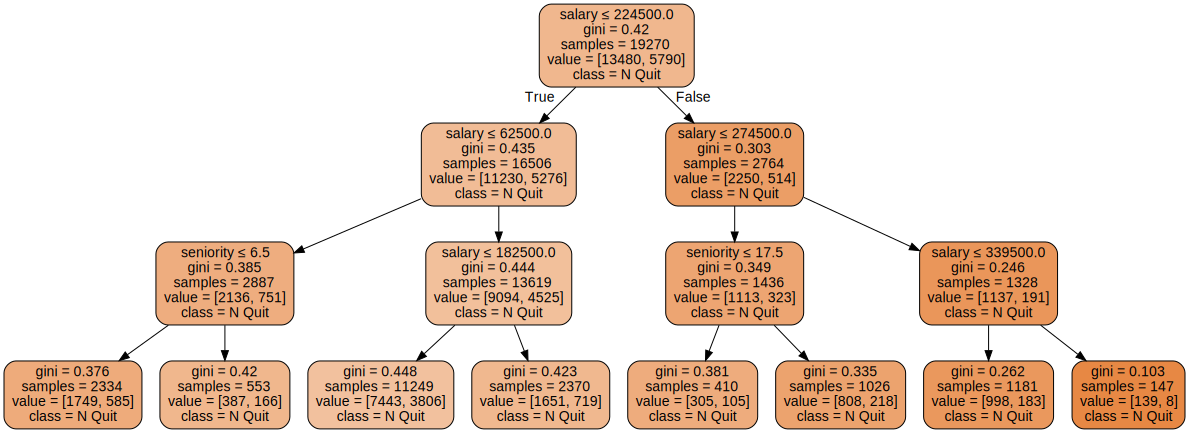

In [19]:
features = list(train_x.columns)
targets = ['N Quit', 'Quit']
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = features, class_names = targets, 
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

Feature Ranking
salary     | 0.97439
seniority  | 0.02561
dept       | 0.00000


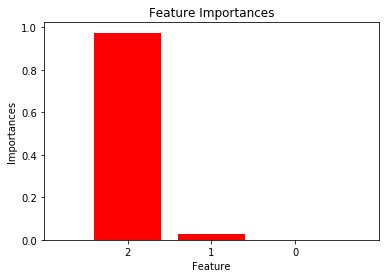

In [25]:
#feature importance
importances = clf.feature_importances_
indices = np.argsort(importances[::-1])

ipt = sorted(zip(features, importances), key = lambda x: x[1], reverse = True)
print ('Feature Ranking')
for f, val in ipt:
        print('{0:10s} | {1:.5f}'.format(f,val))
        
#plot 
plt.figure()
plt.title('Feature Importances')
plt.bar(range(train_x.shape[1]), importances[indices], color = 'r', align = 'center')
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Importances', fontsize = 10)
plt.show()

C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


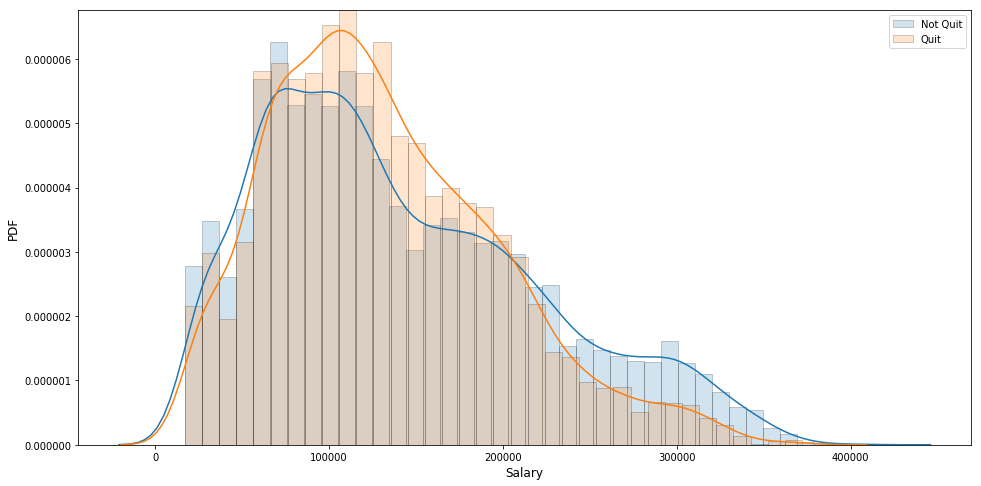

In [26]:
#Visualization
hist_kws = {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig,ax = plt.subplots(figsize = (16,8))
sns.distplot(subset[subset['quit'] == 0]['salary'], 
            label = 'Not Quit', ax = ax, hist_kws = hist_kws)
sns.distplot(subset[subset['quit'] == 1]['salary'],
            label = 'Quit', ax = ax, hist_kws = hist_kws)
ax.set_xlabel('Salary', fontsize = 12)
ax.set_ylabel('PDF', fontsize = 12)
ax.legend()
plt.show()

# Factors for Early Quit

1. We could see how important is salary for an employees' choice in their career. 
2. From the collected quit data, we could see employee would like to quit at year anniversaries.
3. From the plot of employees' salary and probility of quit, we could see that employee with high/low salary are not likely to quit compared to people with middle range salary.